**IMPORTING LIBRARIES**

In [ ]:
# import the sys module
import sys
# import the files module from the google.colab package
from google.colab import files
# insert a new path to the Python system path list
sys.path.insert(0,'/content/drive/MyDrive/IR-Project-Colab')

In [ ]:
# import the drive module from the google.colab package
from google.colab import drive
# mount the Google Drive to the Colab virtual machine
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING UTILITIES AND KNNIMPUTE MODULES FROM GOOGLE DRIVE**

In [ ]:
# copy the Utilities.py file from the IR-Project-Colab directory in Google Drive to the Colab notebook directory
!cp /content/drive/MyDrive/IR-Project-Colab/Utilities.py /content 
# copy the KNNImpute.py file from the IR-Project-Colab directory in Google Drive to the Colab notebook directory
!cp /content/drive/MyDrive/IR-Project-Colab/KNNImpute.py /content

In [ ]:
# import the Utilities module
import Utilities
# import the KNNImpute module
import KNNImpute

**IMPORTING LIBRARIES**

In [ ]:
# Importing Libraries
import numpy as np               # for numerical computing
import pandas as pd              # for data manipulation
import re                        # for regular expressions
import nltk                      # for natural language processing tasks
from nltk.corpus import stopwords    # for removing stop words
from nltk.stem.porter import PorterStemmer    # for stemming words

from sklearn.feature_extraction.text import TfidfVectorizer    # for converting text data to numerical vectors using tf-idf
from sklearn.preprocessing import LabelEncoder    # for encoding categorical variables
from sklearn.preprocessing import OneHotEncoder    # for one-hot encoding categorical variables
from sklearn.preprocessing import OrdinalEncoder    # for ordinal encoding categorical variables
from sklearn.preprocessing import StandardScaler    # for standardizing numerical features
from sklearn.model_selection import train_test_split    # for splitting data into training and testing sets
from sklearn.impute import KNNImputer    # for imputing missing values using k-nearest neighbors

from sklearn.tree import DecisionTreeClassifier    # for building a decision tree classifier
from sklearn import svm    # for building a support vector machine classifier
from sklearn.svm import SVC    # for building a support vector machine classifier

from sklearn.metrics import accuracy_score    # for computing classification accuracy
from sklearn.metrics import precision_score    # for computing precision
from sklearn.metrics import recall_score    # for computing recall
from sklearn.metrics import f1_score    # for computing F1 score
from sklearn.metrics import cohen_kappa_score    # for computing Cohen's kappa score
from sklearn.metrics import roc_auc_score    # for computing ROC AUC score
from sklearn.metrics import confusion_matrix    # for computing confusion matrix
from sklearn.metrics import hamming_loss    # for computing Hamming loss                  
from sklearn.metrics import classification_report    # for generating a classification report

**RETRIEVING TRAINING DATA AND IMPUTING NULL VALUES**

In [ ]:
# Import necessary libraries
nltk.download('stopwords')
import pandas as pd

# Define column labels
labels=["country", "sku_id", "title", "category_lvl1","category_lvl2","category_lvl3", "description", "price", "type"]

# Define function to get training dataset
def getTrainingDataset():
    return pd.read_csv('data_train.csv', header=None, names=labels)  

# Define function to print null statistics for a dataframe
def NullStatistics(df):
    missing_val = df.isnull().sum()
    print(missing_val)
    total_cells = np.product(df.shape)
    missing_percent = (missing_val.sum()/total_cells) *100
    print(f'\nThe missing data percent is: {missing_percent}')

# Get training dataset
trainingDataset=getTrainingDataset()

# Clean the training dataset using a custom utility function
train_df,Y1,Y2,Y3=Utilities.Cleaning_Data_Utility(trainingDataset) #Utilities. hatadena yahan se 

# Print null statistics for the original dataset
NullStatistics(train_df)

# Get unique values for category columns for KNN imputation
unique_label_c1, unique_label_c2, unique_label_c3 = KNNImpute.preserve_label(train_df) #It has all unique values lying in ctg1 , 2 , 3 column

# Encode category columns using KNNImpute encoding
KNNImpute.encode(['category_lvl1', 'category_lvl2', 'category_lvl3'],train_df)        #Performed encoding for CTGLVL3 KNN

# Impute missing values using KNN imputation
train_df_imputed = KNNImpute.impute(train_df)

# Clean the imputed dataset and remove additional columns created during encoding
train_df_imputed =  KNNImpute.clean_csv(train_df_imputed,train_df)

# Print null statistics for the imputed dataset
NullStatistics(train_df_imputed)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


category_lvl1       0
category_lvl2       0
category_lvl3    2135
titleDescp          0
dtype: int64

The missing data percent is: 1.4710746079431138


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


category_lvl1    0
category_lvl2    0
category_lvl3    0
Title_desc       0
dtype: int64

The missing data percent is: 0.0


**PRINTING UNIQUE LABELS FOR EACH CATEGORY**

In [ ]:
print(len(unique_label_c1))
print(len(unique_label_c2))
print(len(unique_label_c3))

9
57
185


**PERFORMING FEATURE EXTRACTION AND SPLITTING DATA INTO TRAINING AND TESTING**

In [ ]:
#Import TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Get the 'Title_desc' column from the imputed training dataset
X = train_df_imputed['Title_desc']

#Get the target variables for each category level from the imputed training dataset
Y1 = train_df_imputed['category_lvl1']
Y2 = train_df_imputed['category_lvl2']
Y3 = train_df_imputed['category_lvl3']

#Instantiate a TfidfVectorizer object
vectorizer = TfidfVectorizer()

#Fit the vectorizer on the 'Title_desc' column
vectorizer.fit(X)

#Transform the 'Title_desc' column into a sparse matrix of TF-IDF features
X_tfidf = vectorizer.transform(X)

#Print the resulting sparse matrix (optional)
# print(X_tfidf)

**APPLYING SVM**

CATEGORY 1

In [ ]:
#Importing necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y1, test_size=0.3, random_state=42)

#Printing the shape of training and testing sets
# print (X_train.shape)
# print (X_test.shape)

#Creating an instance of Support Vector Machine (SVM) classifier
SVM_Classfier=SVC(kernel='linear' , random_state=0)

#Fitting the SVM classifier on the training set
model1 = SVM_Classfier.fit(X_train,y_train)

#Predicting the output on the testing set
Y_Pred_c1=model1.predict(X_test)

#Printing the predicted output and the accuracy of the model
# print(Y_Pred_c1)

Accuracy score with linear kernel is : 
92.85254937988057
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       610
         1.0       0.93      0.87      0.90       897
         2.0       0.96      0.96      0.96      1756
         3.0       0.95      0.94      0.94      1144
         4.0       0.86      0.93      0.89      1847
         5.0       0.92      0.83      0.87       452
         6.0       0.95      0.96      0.95      2139
         7.0       0.87      0.85      0.86       733
         8.0       0.96      0.95      0.96      1307

    accuracy                           0.93     10885
   macro avg       0.93      0.91      0.92     10885
weighted avg       0.93      0.93      0.93     10885



Text(0.5, 102.72222222222219, 'Predicted label')

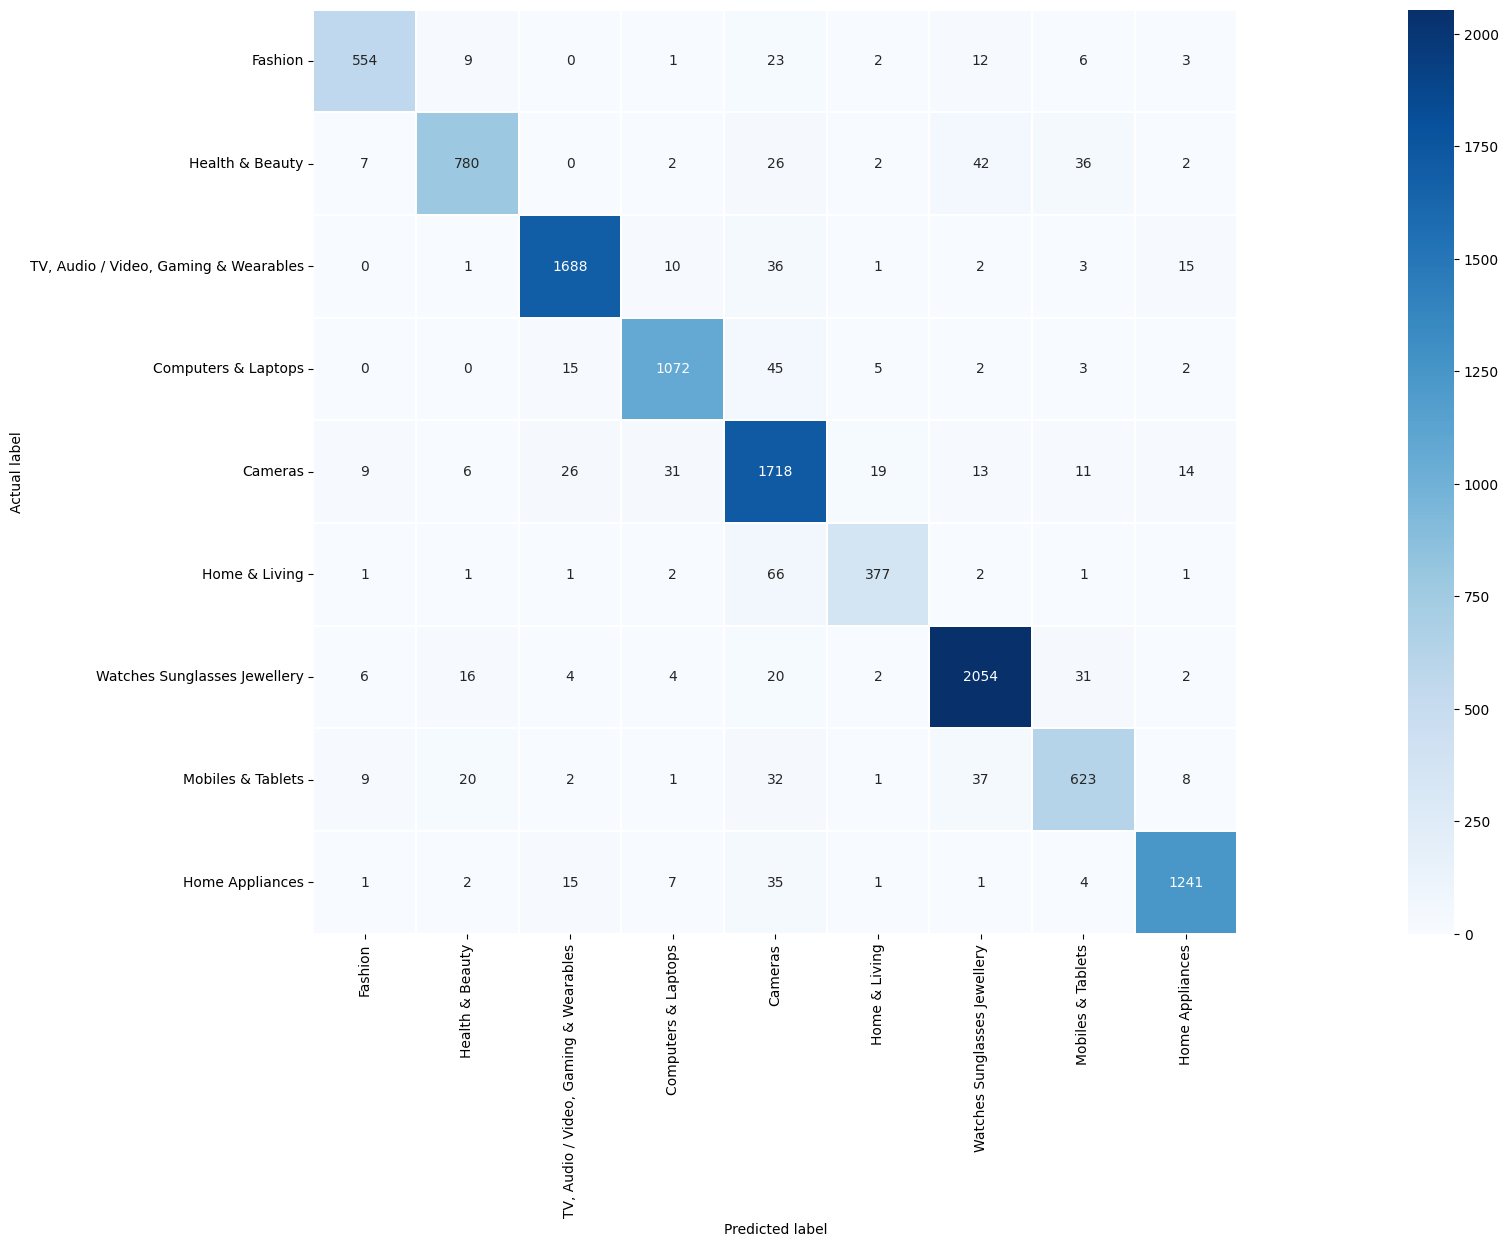

In [ ]:
#importing required libraries
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

#printing the accuracy score for Y1 predictions
print('Accuracy score with linear kernel is : ')
print(metrics.accuracy_score(y_test,Y_Pred_c1)*100)

#computing the confusion matrix for Y1 predictions
cf_matrix = confusion_matrix(y_test, Y_Pred_c1)

#printing the classification report for Y1 predictions
print(classification_report(y_test, Y_Pred_c1))

#plotting the confusion matrix as heatmap using seaborn
plt.figure(figsize=(44,12))
sns.heatmap(cf_matrix,annot=True ,fmt='d', cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c1, yticklabels= unique_label_c1 )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

CATEGORY 2

In [ ]:
#Importing necessary libraries and modules
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y2, test_size=0.3, stratify= Y2, random_state=42)

#Creating and training a linear SVM classifier
SVM_Classfier=SVC(kernel='linear' , random_state=0)
model2=SVM_Classfier.fit(X_train,y_train)

#Predicting the categories of test data using the trained model
Y_Pred_c2=model2.predict(X_test)
# print(Y_Pred_c2)

Accuracy score with linear kernel is : 
86.10932475884245
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2071
         1.0       0.78      0.83      0.80       350
         2.0       0.83      0.72      0.77        72
         3.0       0.64      0.69      0.67       100
         4.0       0.77      0.71      0.74       128
         5.0       0.90      0.88      0.89       107
         6.0       0.71      0.26      0.38        19
         7.0       0.86      0.84      0.85       235
         8.0       0.86      0.82      0.84       444
         9.0       0.97      0.89      0.93        36
        10.0       0.77      0.88      0.83       104
        11.0       1.00      0.75      0.86        16
        12.0       0.94      0.45      0.61        33
        13.0       0.88      0.82      0.85        17
        14.0       0.97      0.99      0.98       134
        15.0       0.92      0.85      0.89       137
        16.0       0.99

Text(0.5, 102.72222222222219, 'Predicted lable')

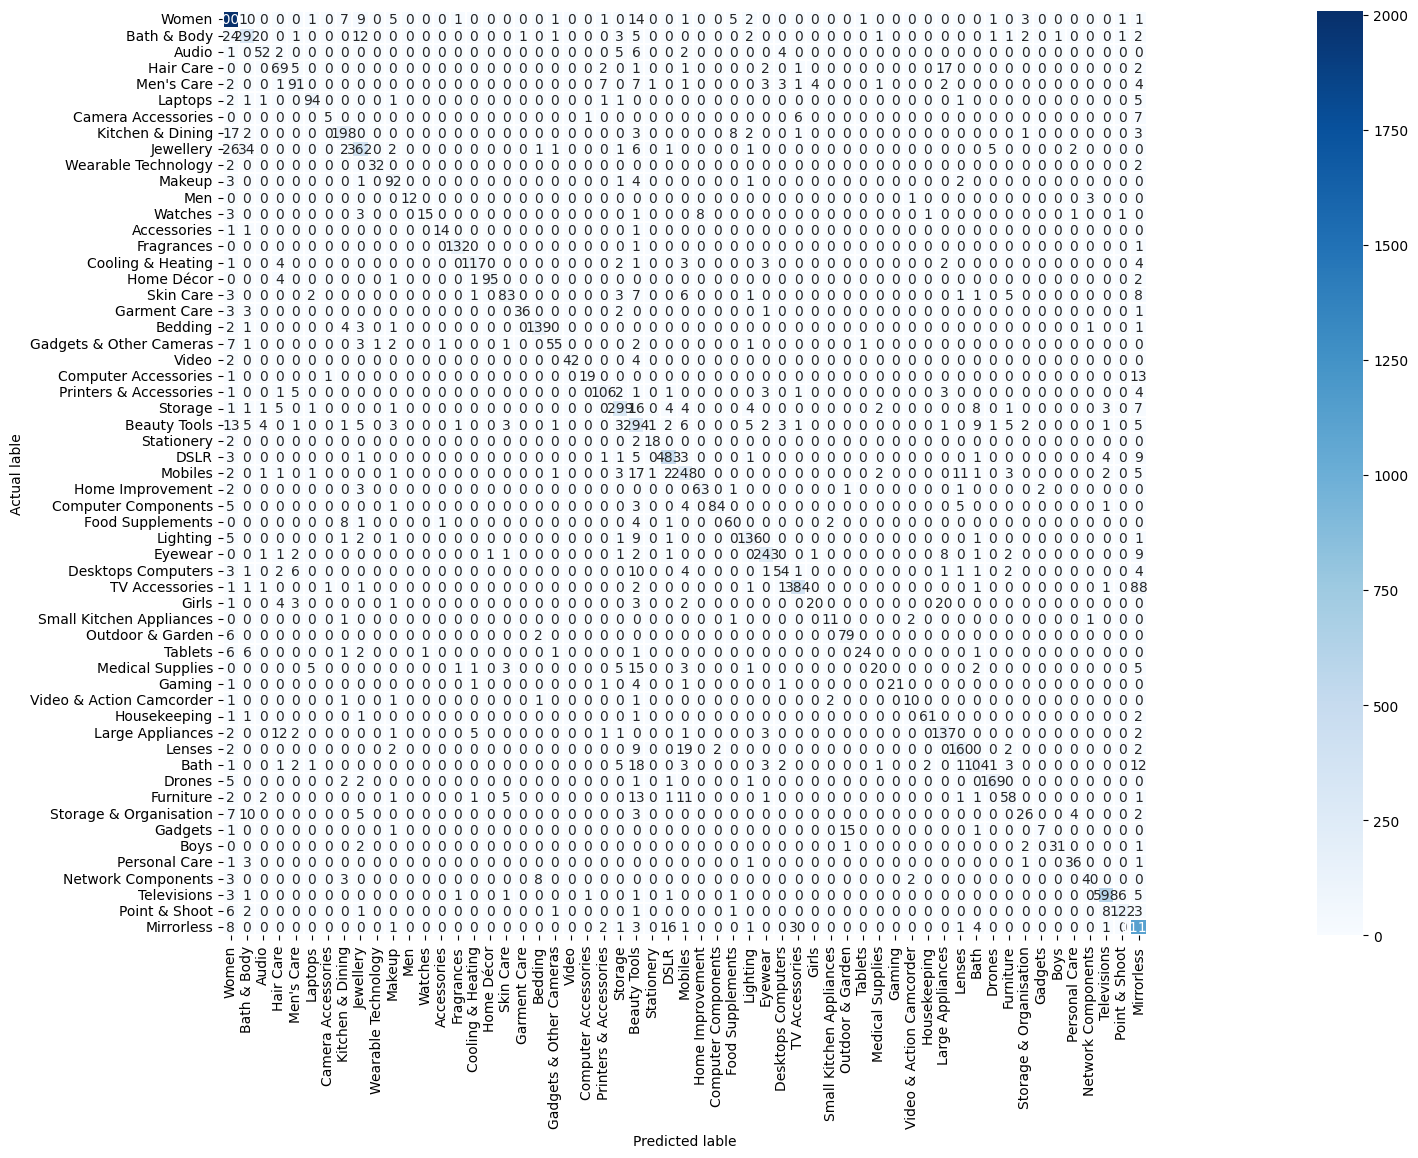

In [ ]:
#Printing the accuracy score for the second level category classification
print('Accuracy score with linear kernel is : ')
print(metrics.accuracy_score(y_test,Y_Pred_c2)*100)

#Calculating the confusion matrix and printing the classification report for the second level category classification
cf_matrix = confusion_matrix(y_test, Y_Pred_c2)
print(classification_report(y_test, Y_Pred_c2))

#Plotting the confusion matrix heatmap for the second level category classification using seaborn library
plt.figure(figsize=(44,12))
sns.heatmap(cf_matrix,annot=True ,fmt='d', cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c2, yticklabels= unique_label_c2 )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

CATEGORY 3

In [ ]:
#Splitting the data into training and testing sets with 70% data for training and 30% data for testing, while ensuring that the class distribution is preserved using stratify=Y3
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y3, test_size=0.3, stratify= Y3, random_state=42)

#Creating a Support Vector Machine (SVM) classifier with a linear kernel
SVM_Classfier=SVC(kernel='linear' , random_state=0)

#Training the model on the training set
model3=SVM_Classfier.fit(X_train,y_train)

#Using the trained model to make predictions on the testing set
Y_Pred_c3=model3.predict(X_test)

Accuracy score with linear kernel is : 
76.45383555351401
              precision    recall  f1-score   support

         0.0       0.59      0.62      0.61        16
         1.0       0.78      0.78      0.78       171
         2.0       0.73      0.70      0.72        27
         3.0       0.44      0.39      0.41        36
         4.0       0.83      0.59      0.69        17
         5.0       0.96      0.84      0.90        32
         6.0       0.75      0.38      0.50        16
         7.0       0.79      0.63      0.70        35
         8.0       0.47      0.38      0.42        42
         9.0       0.88      0.94      0.91       262
        10.0       0.70      0.75      0.72        51
        11.0       0.69      0.47      0.56        19
        12.0       0.79      0.51      0.62        37
        13.0       0.89      0.76      0.82        21
        14.0       0.70      0.65      0.67       133
        15.0       0.90      0.91      0.91       102
        16.0       0.67

Text(0.5, 1265.7222222222217, 'Predicted lable')

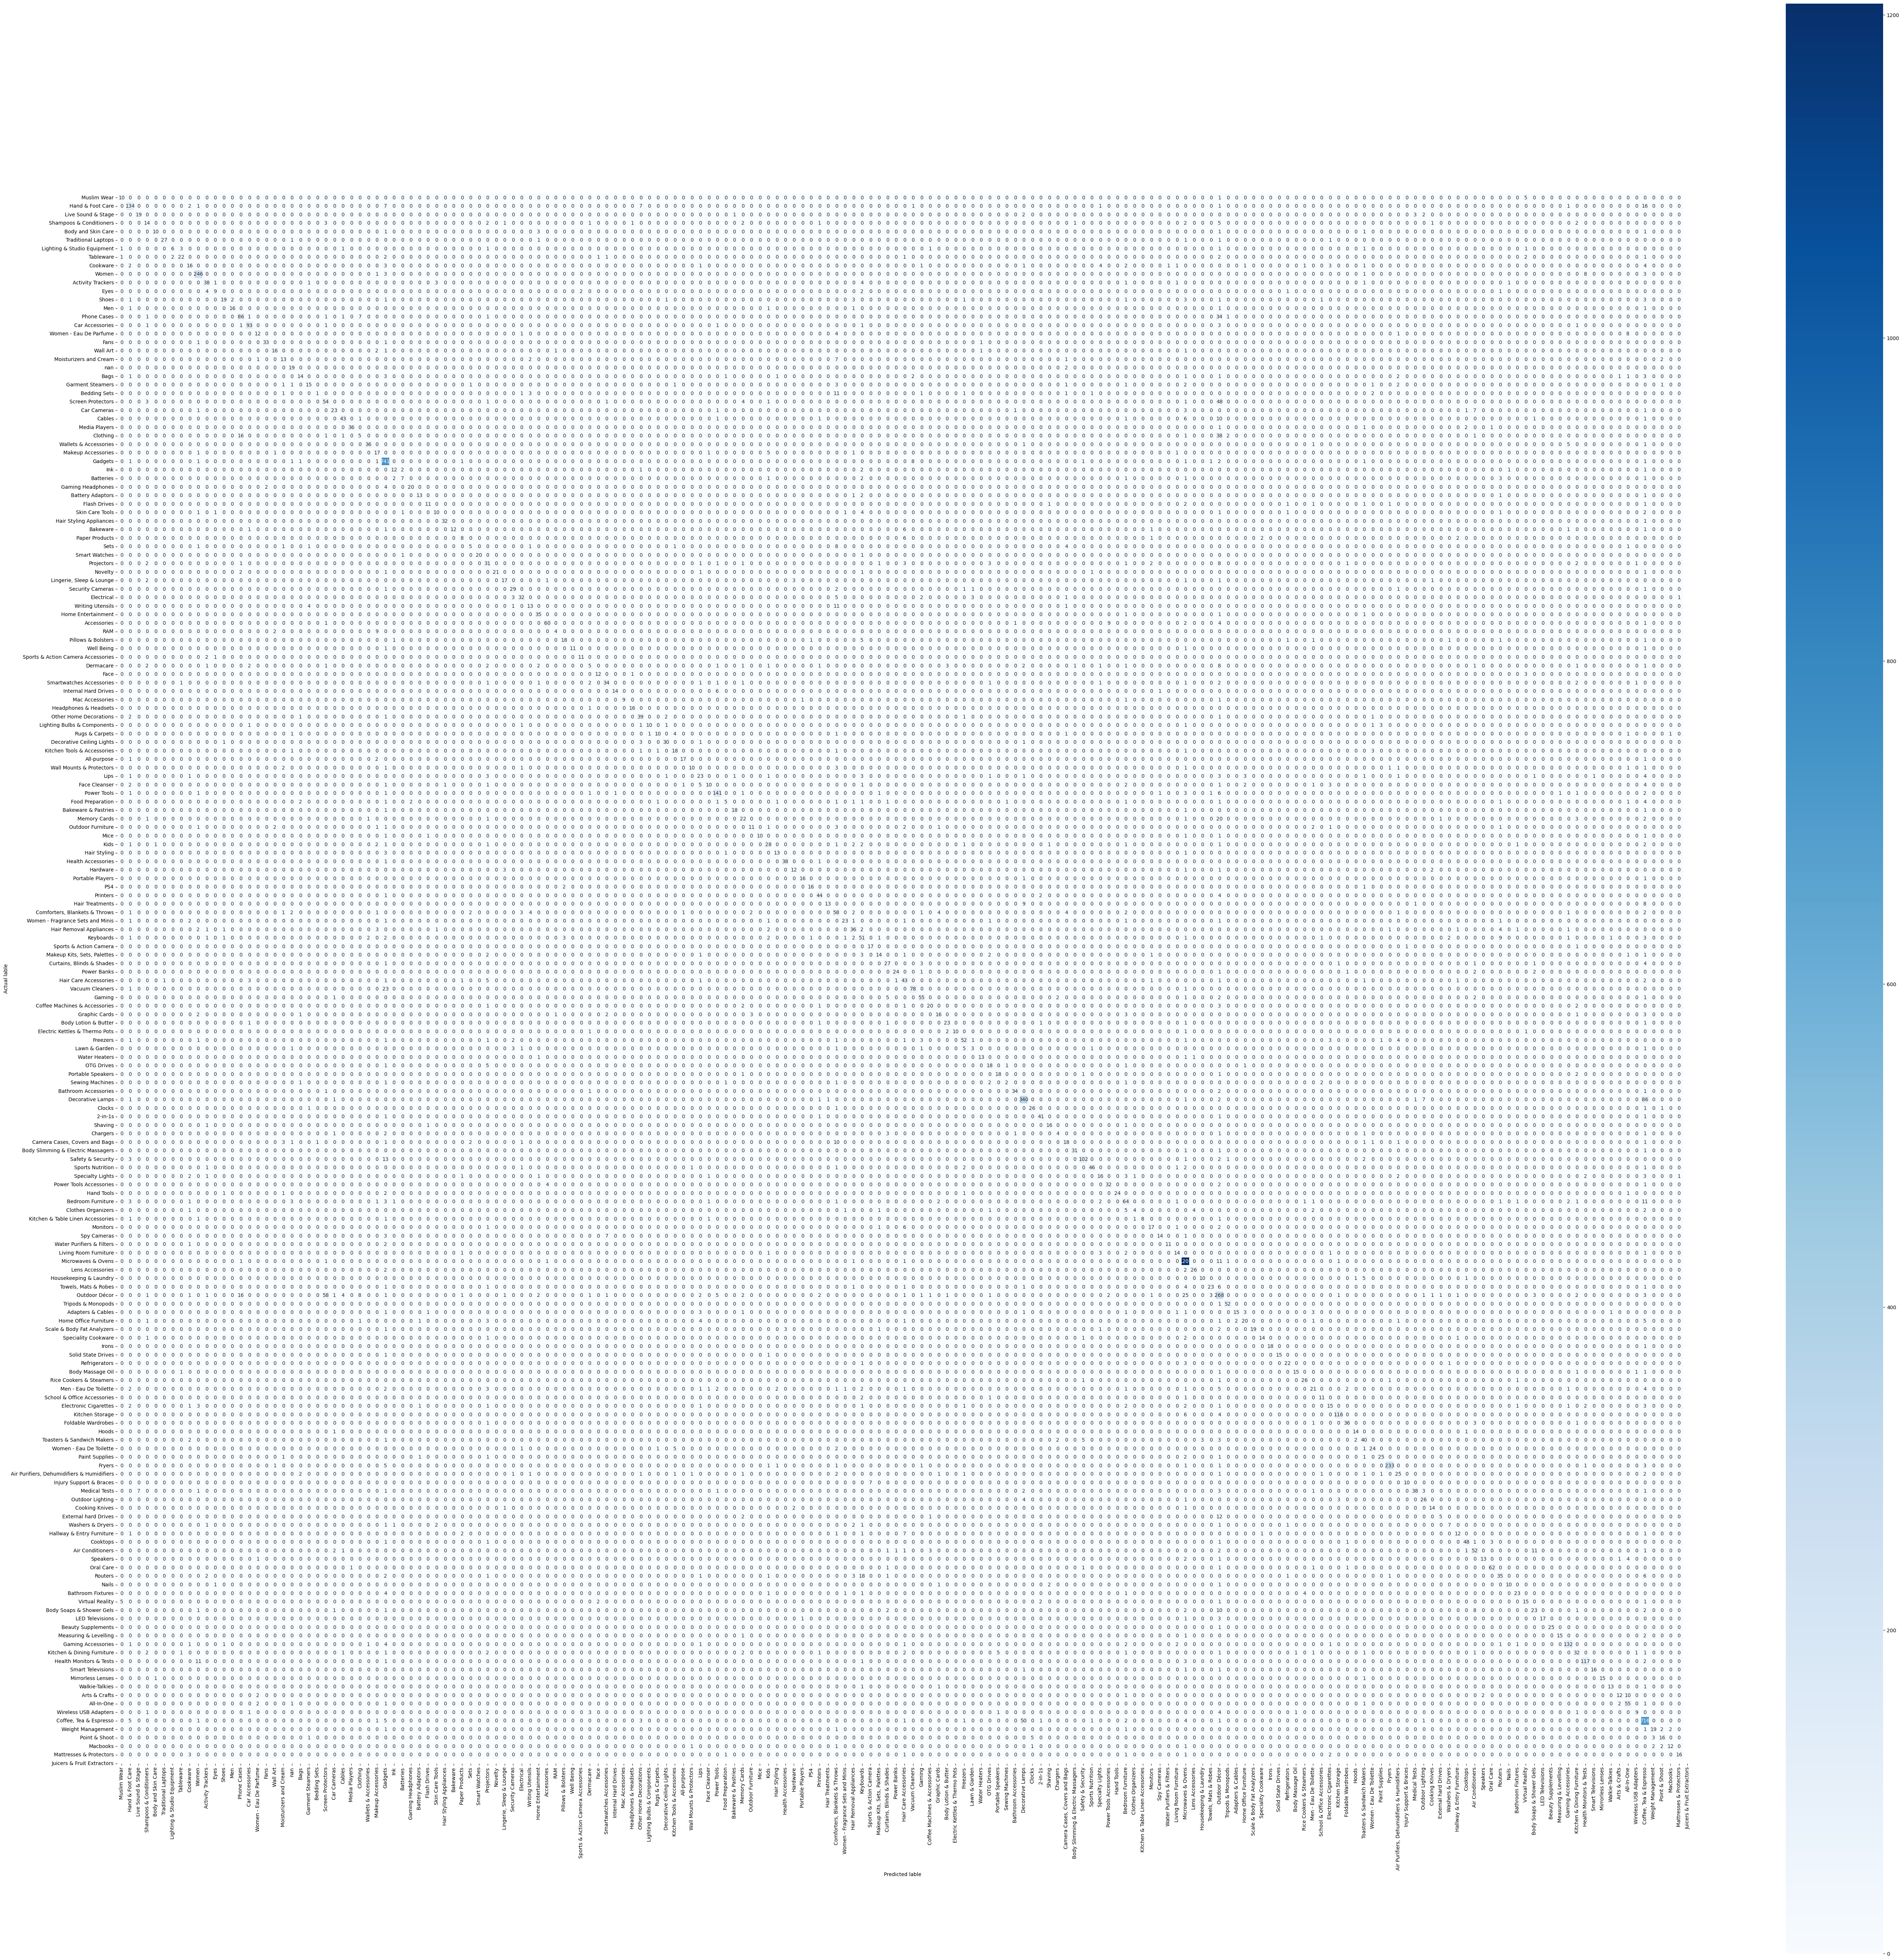

In [ ]:
# Calculate and print the accuracy score of the predictions made using a linear kernel
print('Accuracy score with linear kernel is : ')
print(metrics.accuracy_score(y_test,Y_Pred_c3)*100)

# Generate a confusion matrix using the predicted and actual labels
cf_matrix = confusion_matrix(y_test, Y_Pred_c3)

# Generate a classification report using the predicted and actual labels
print(classification_report(y_test, Y_Pred_c3))

# Plot the confusion matrix as a heatmap using seaborn
plt.figure(figsize=(70,70))
sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c3, yticklabels= unique_label_c3  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

**RETRIEVING TESTING DATA AND IMPUTING NULL VALUES**

In [ ]:
#This code defines a list of column names called "labels"
labels=["country", "sku_id", "title", "category_lvl1","category_lvl2","category_lvl3", "description", "price", "type"]

#This function takes a pandas DataFrame as an argument and prints the number of missing values and the percentage of missing data
def NullStatistics(df):
  missing_val = df.isnull().sum() # calculate the number of missing values in each column
  print(missing_val)
  total_cells = np.product(df.shape) # calculate the total number of cells in the DataFrame
  missing_percent = (missing_val.sum()/total_cells) *100 # calculate the percentage of missing data in the DataFrame
  print(f'\nThe missing data percent is: {missing_percent}')

#This line reads a CSV file "data_valid.csv" and assigns column names to it using the list "labels".
#The resulting DataFrame is stored in the variable "testingDataset".
testingDataset=pd.read_csv('data_valid.csv' , header=None, names=labels)

#The following line uses a custom function called "Cleaning_Data_Utility" from a module called "Utilities" to clean the data in "testingDataset".
#The cleaned DataFrame is stored in "train_df", while "Y1", "Y2", and "Y3" are additional variables that are not used later in the script.
train_df,Y1,Y2,Y3=Utilities.Cleaning_Data_Utility(testingDataset)

#This line calls the "NullStatistics" function to print the number of missing values in "train_df".
NullStatistics(train_df)

#The following lines use a custom function called "preserve_label" from a module called "KNNImpute" to save the unique values of each column in "train_df".
unique_label_c1, unique_label_c2, unique_label_c3 = KNNImpute.preserve_label(train_df)

#This line uses another custom function called "encode" from the "KNNImpute" module to convert the categorical columns in "train_df" into numerical values.
KNNImpute.encode(['category_lvl1', 'category_lvl2', 'category_lvl3'],train_df)

#These lines use the "KNNImpute" module to impute the missing values in "train_df" using the K-Nearest Neighbors algorithm.
#The resulting DataFrame with imputed values is stored in "train_df_imputed".
train_df_imputed = KNNImpute.impute(train_df)
train_df_imputed = KNNImpute.clean_csv(train_df_imputed,train_df)

#This line calls the "NullStatistics" function again to print the number of missing values in the imputed DataFrame "train_df_imputed".
NullStatistics(train_df_imputed)

category_lvl1      0
category_lvl2      0
category_lvl3    687
titleDescp         0
dtype: int64

The missing data percent is: 1.4508362899138367


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


category_lvl1    0
category_lvl2    0
category_lvl3    0
Title_desc       0
dtype: int64

The missing data percent is: 0.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer   # Importing TfidfVectorizer class from the sklearn library for text data preprocessing
X = train_df_imputed['Title_desc']    # Assigning the 'Title_desc' column of the 'train_df_imputed' dataframe to variable X
Y1 = train_df_imputed['category_lvl1']   # Assigning the 'category_lvl1' column of the 'train_df_imputed' dataframe to variable Y1
Y2 = train_df_imputed['category_lvl2']   # Assigning the 'category_lvl2' column of the 'train_df_imputed' dataframe to variable Y2
Y3 = train_df_imputed['category_lvl3']   # Assigning the 'category_lvl3' column of the 'train_df_imputed' dataframe to variable Y3

# vectorizer = TfidfVectorizer()
# vectorizer.fit(X)   #Test (Unseen data is never fitted)
x_test_tfidf = vectorizer.transform(X)   # Transforming the textual data in X into numerical feature vectors using TfidfVectorizer and storing the resulting feature matrix in x_test_tfidf

In [ ]:
y_pred_cat_one = model1.predict(x_test_tfidf)

92.60854874134145
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       646
         1.0       0.93      0.89      0.91       965
         2.0       0.96      0.95      0.95      1855
         3.0       0.95      0.93      0.94      1339
         4.0       0.85      0.93      0.89      1993
         5.0       0.91      0.81      0.85       525
         6.0       0.95      0.96      0.95      2328
         7.0       0.86      0.84      0.85       824
         8.0       0.97      0.95      0.96      1363

    accuracy                           0.93     11838
   macro avg       0.93      0.91      0.92     11838
weighted avg       0.93      0.93      0.93     11838



Text(0.5, 102.72222222222219, 'Predicted lable')

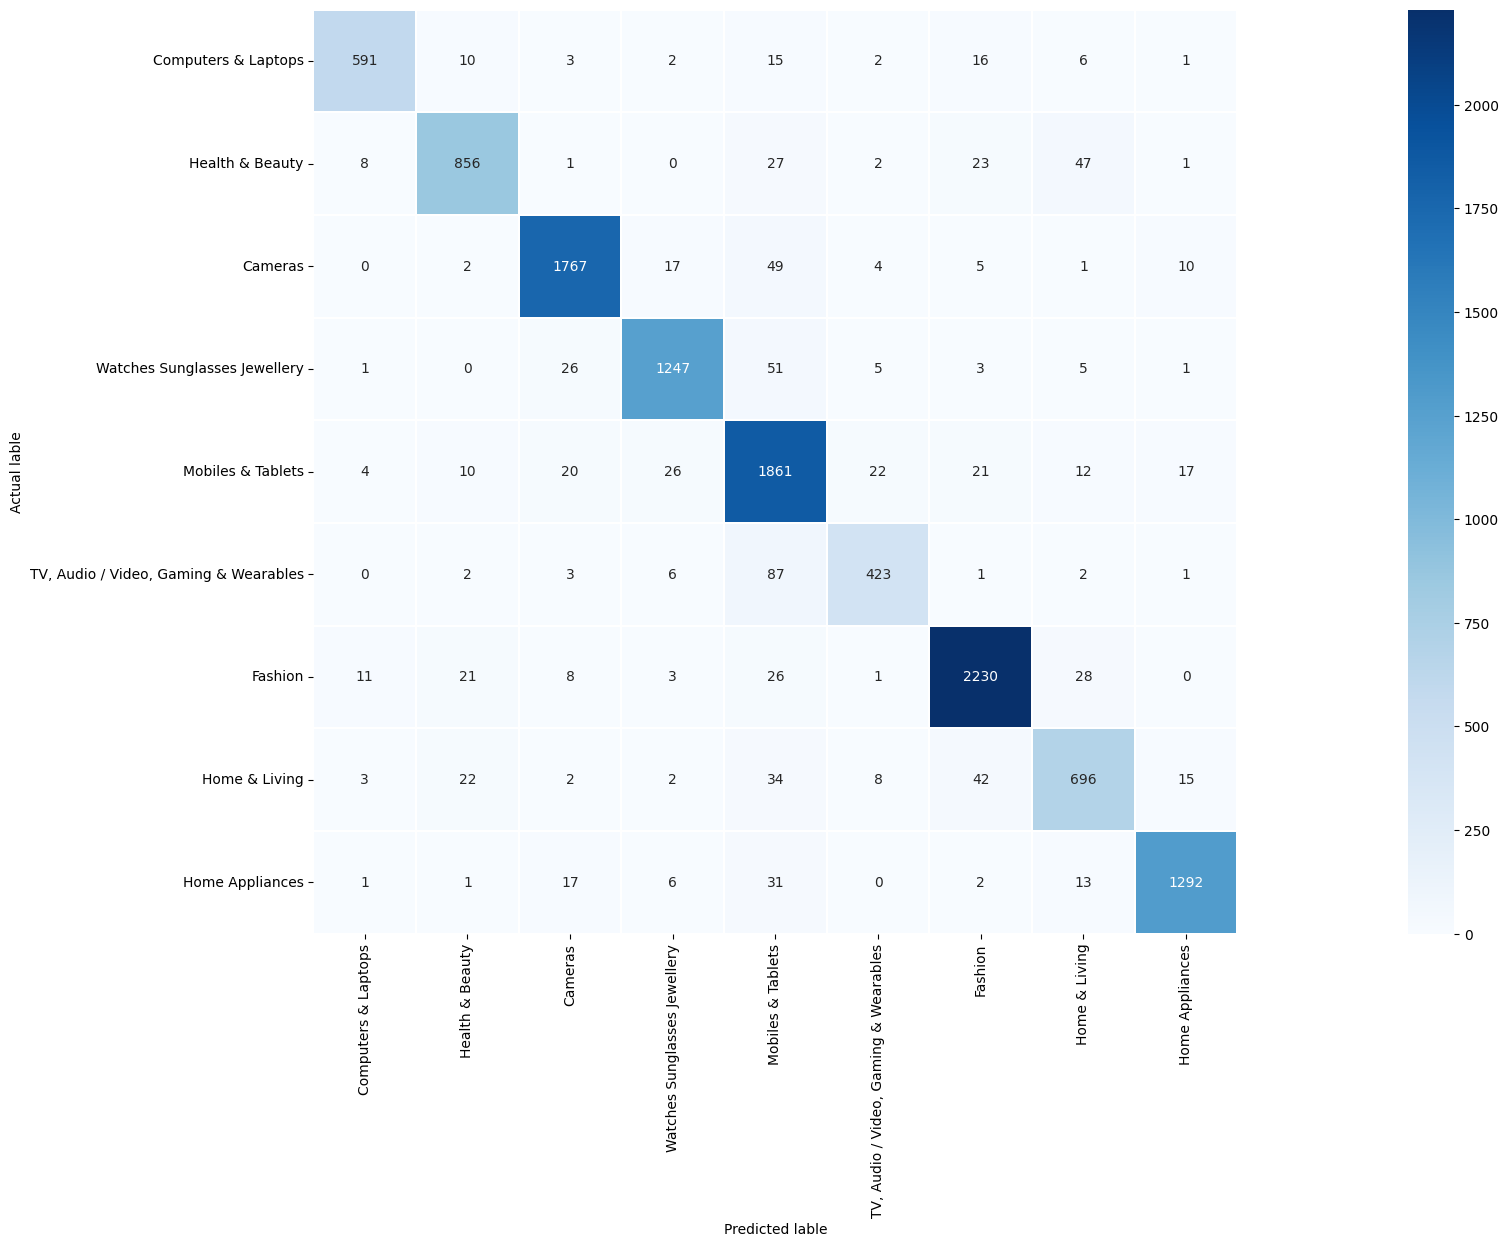

In [ ]:
print(metrics.accuracy_score(Y1, y_pred_cat_one)*100)  # Calculating and printing the accuracy score of the predicted values 'y_pred_cat_one' against the true values 'Y1'
cf_matrix = confusion_matrix(Y1, y_pred_cat_one)  # Calculating the confusion matrix using the true values 'Y1' and predicted values 'y_pred_cat_one'
print(classification_report(Y1, y_pred_cat_one))  # Generating a classification report containing precision, recall, f1-score, and support metrics for each class

plt.figure(figsize=(44,12))  # Setting the size of the figure

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c1, yticklabels= unique_label_c1  )  # Plotting a heatmap of the confusion matrix using Seaborn's heatmap function. 'annot=True' displays the values of the matrix, 'fmt='d'' specifies the format of the displayed values as integers, 'cmap='Blues'' sets the color map, 'square=True' sets the aspect ratio of the plot as square, 'cbar=True' displays the color bar, 'linewidths=.10' sets the width of the lines separating the boxes, 'xticklabels=unique_label_c1' and 'yticklabels=unique_label_c1' sets the x and y tick labels as the unique categories in Y1, respectively.

plt.ylabel('Actual lable')  # Setting the label of y-axis as 'Actual label'
plt.xlabel('Predicted lable')  # Setting the label of x-axis as 'Predicted label'

CATEGORY 2

In [ ]:
y_pred_cat_2 = model2.predict(x_test_tfidf)

85.38604494002365
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      2206
         1.0       0.82      0.86      0.84       381
         2.0       0.83      0.62      0.71        78
         3.0       0.65      0.65      0.65       111
         4.0       0.77      0.67      0.72       144
         5.0       0.94      0.94      0.94       124
         6.0       0.80      0.36      0.50        22
         7.0       0.86      0.82      0.84       256
         8.0       0.85      0.80      0.82       485
         9.0       0.97      0.90      0.94        41
        10.0       0.77      0.85      0.81       114
        11.0       0.74      0.74      0.74        19
        12.0       0.93      0.66      0.77        38
        13.0       0.93      0.74      0.82        19
        14.0       0.93      0.97      0.95       146
        15.0       0.87      0.85      0.86       151
        16.0       0.96      0.94      0.95       108
        1

Text(0.5, 102.72222222222219, 'Predicted lable')

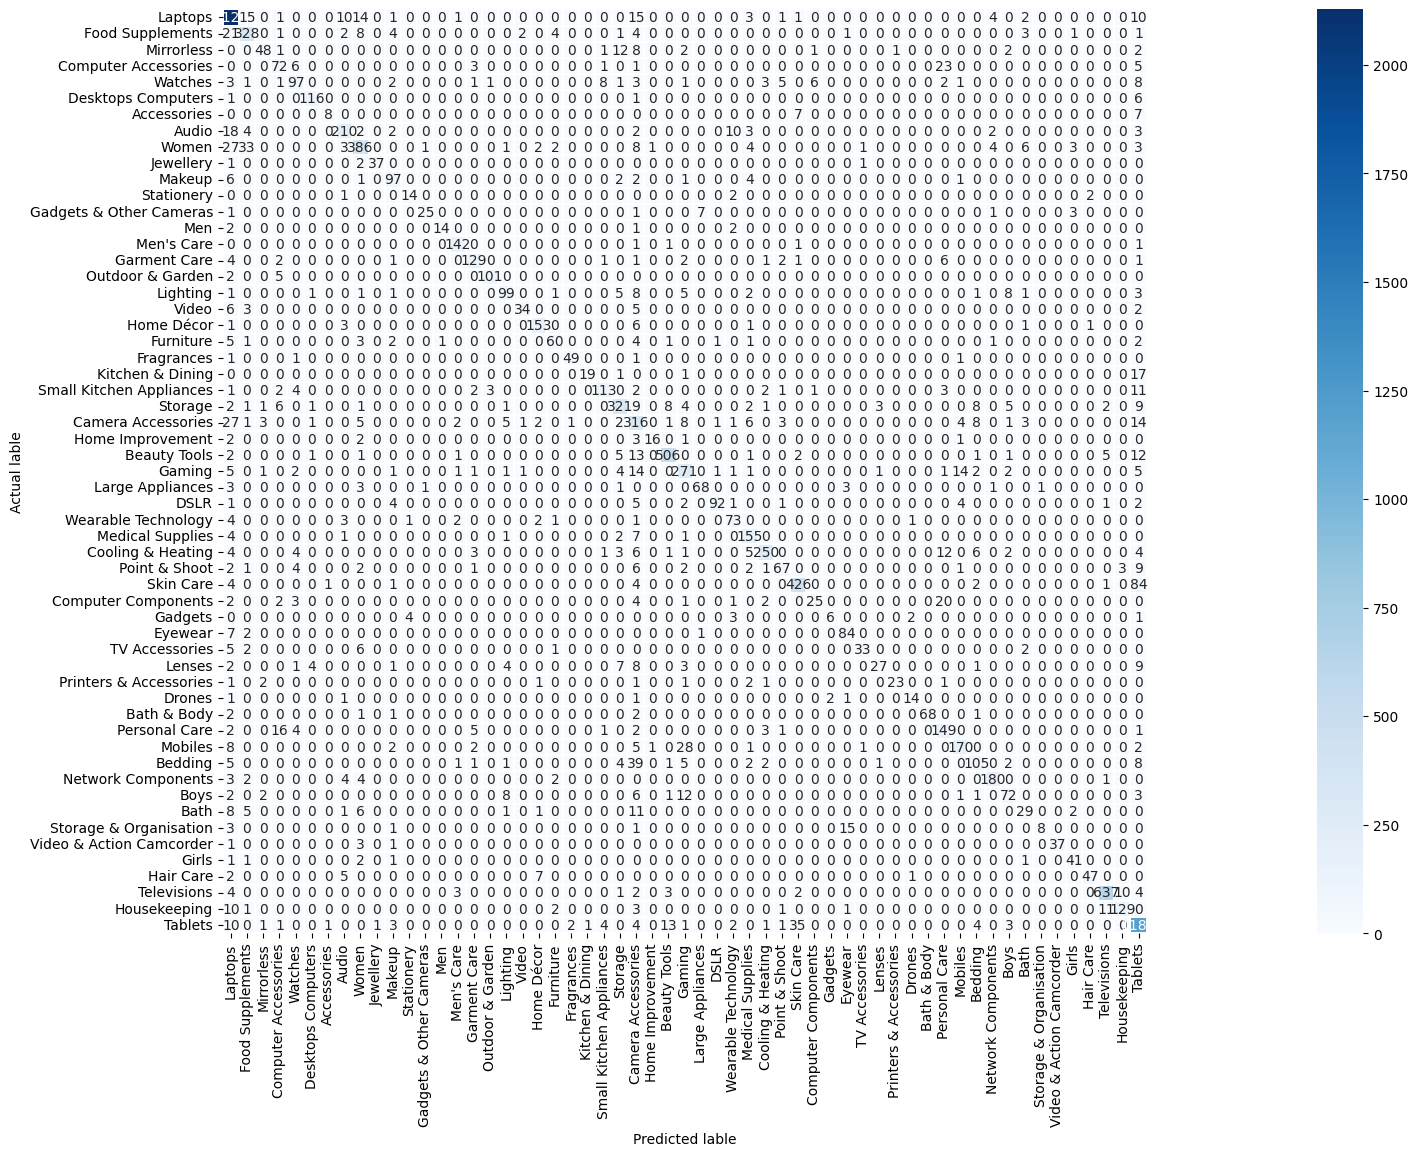

In [ ]:
print(metrics.accuracy_score(Y2, y_pred_cat_2)*100)  # Calculating and printing the accuracy score of the predicted values 'y_pred_cat_2' against the true values 'Y2'
cf_matrix = confusion_matrix(Y2, y_pred_cat_2)  # Calculating the confusion matrix using the true values 'Y2' and predicted values 'y_pred_cat_2'
print(classification_report(Y2, y_pred_cat_2))  # Generating a classification report containing precision, recall, f1-score, and support metrics for each class

plt.figure(figsize=(44,12))  # Setting the size of the figure

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c2, yticklabels= unique_label_c2  )  # Plotting a heatmap of the confusion matrix using Seaborn's heatmap function. 'annot=True' displays the values of the matrix, 'fmt='d'' specifies the format of the displayed values as integers, 'cmap='Blues'' sets the color map, 'square=True' sets the aspect ratio of the plot as square, 'cbar=True' displays the color bar, 'linewidths=.10' sets the width of the lines separating the boxes, 'xticklabels=unique_label_c2' and 'yticklabels=unique_label_c2' sets the x and y tick labels as the unique categories in Y2, respectively.

plt.ylabel('Actual lable')  # Setting the label of y-axis as 'Actual label'
plt.xlabel('Predicted lable')  # Setting the label of x-axis as 'Predicted label'

CATEGORY 3

In [ ]:
y_pred_cat_3 = model3.predict(x_test_tfidf)

75.57864504139212
              precision    recall  f1-score   support

         0.0       0.79      0.61      0.69        18
         1.0       0.77      0.78      0.78       187
         2.0       0.60      0.68      0.64        31
         3.0       0.67      0.75      0.71        40
         4.0       1.00      0.74      0.85        19
         5.0       0.97      0.83      0.90        36
         6.0       0.90      0.24      0.38        37
         7.0       0.38      0.75      0.50        20
         8.0       0.47      0.49      0.48        45
         9.0       0.88      0.92      0.90       283
        10.0       0.81      0.78      0.80        55
        11.0       0.89      0.38      0.53        21
        12.0       0.84      0.68      0.75        40
        13.0       0.70      0.61      0.65        23
        14.0       0.59      0.65      0.62       141
        15.0       0.93      0.83      0.87       110
        16.0       0.62      0.57      0.59        28
        1

Text(0.5, 102.72222222222219, 'Predicted label')

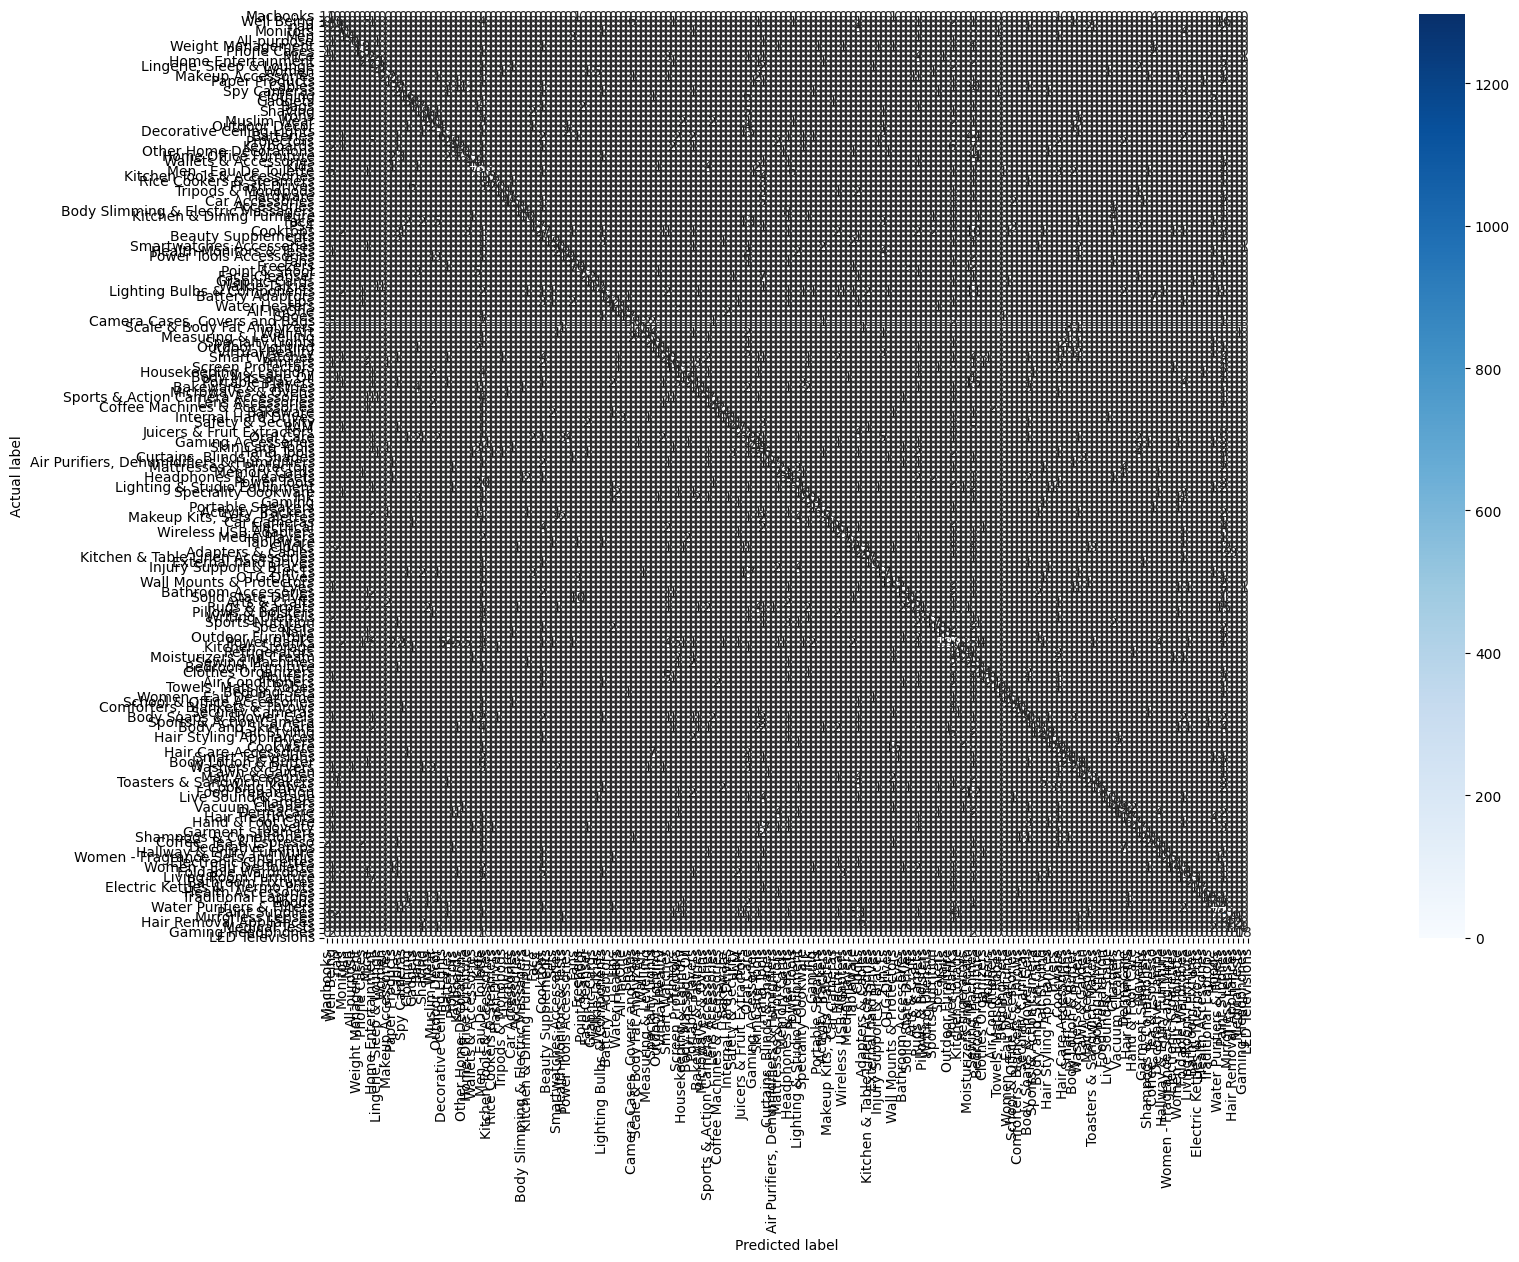

In [ ]:
# Print the accuracy score of the predicted labels and actual labels
print(metrics.accuracy_score(Y3, y_pred_cat_3)*100)

# Generate a confusion matrix using the predicted and actual labels
cf_matrix = confusion_matrix(Y3, y_pred_cat_3)

# Print a classification report showing precision, recall, and f1-score for each class
print(classification_report(Y3, y_pred_cat_3))

# Create a new figure with a specific size
plt.figure(figsize=(44,12))

# Generate a heatmap of the confusion matrix with annotations and specific formatting
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', square=True, cbar=True, linewidths=.10, xticklabels=unique_label_c3, yticklabels=unique_label_c3)

# Set the label of the y-axis
plt.ylabel('Actual label')

# Set the label of the x-axis
plt.xlabel('Predicted label')

**DECODING NUMERICS TO CATEGORIES**

In [ ]:
# This function takes a number and decodes it into a categorical label for category 1
def decode_cat01(number):
    # Create a new LabelEncoder object and fit it to the unique labels for category 1
    le = LabelEncoder()
    le.fit(unique_label_c1)
    LabelEncoder()
    # Transform the unique labels for category 1 into an encoded form
    le.transform(unique_label_c1)
    # Inverse transform the input number to get the corresponding categorical label
    return str(le.inverse_transform([number]))

# This function takes a number and decodes it into a categorical label for category 2
def decode_cat02(number):
    # Create a new LabelEncoder object and fit it to the unique labels for category 2
    le = LabelEncoder()
    le.fit(unique_label_c2)
    LabelEncoder()
    # Transform the unique labels for category 2 into an encoded form
    le.transform(unique_label_c2)
    # Inverse transform the input number to get the corresponding categorical label
    return str(le.inverse_transform([number]))

# This function takes a number and decodes it into a categorical label for category 3
def decode_cat03(number):
    # Create a new LabelEncoder object and fit it to the unique labels for category 3
    le = LabelEncoder()
    le.fit(unique_label_c3)
    LabelEncoder()
    # Transform the unique labels for category 3 into an encoded form
    le.transform(unique_label_c3)
    # Inverse transform the input number to get the corresponding categorical label
    return str(le.inverse_transform([number]))

# # Decode and print an example number for category 1
# print(decode_cat01(8)) #0-8

# # Decode and print an example number for category 2
# print(decode_cat02(56)) #0-56

# # Decode and print an example number for category 3
# print(decode_cat03(183)) #0-184

**SAVING THE MODELS**

In [ ]:
#This imports the pickle module, which is used for serializing and deserializing Python objects.
import pickle
#This saves model1 to a file called model1.pickle. pickle.dump is used to serialize the model1 object and write it to a file in binary mode ('wb').
pickle.dump(model1, open('model1.pickle', 'wb'))
#This saves model2 to a file called model2.pickle. pickle.dump is used to serialize the model2 object and write it to a file in binary mode ('wb')
pickle.dump(model2, open('model2.pickle', 'wb'))
#This saves model3 to a file called model3.pickle. pickle.dump is used to serialize the model3 object and write it to a file in binary mode ('wb').
pickle.dump(model3, open('model3.pickle', 'wb'))

In [ ]:
#This code saves the trained vectorizer object as a binary file named "vectorizer.pickle" using the pickle module. The vectorizer object can be later loaded and used for transforming new text data without retraining the vectorizer. The wb argument specifies that the file is opened in write-binary mode.

pickle.dump(vectorizer, open("vectorizer.pickle", "wb")) #vectorizer is tfidf vectorizer

**QUERY TESTING**

In [ ]:
from collections import defaultdict
import copy

# Define a function to load the SVM models from pickle files
def Load_Svm_Models():
    model_c1_svm = pickle.load(open('model1.pickle', 'rb'))
    model_c2_svm = pickle.load(open('model2.pickle', 'rb'))
    model_c3_svm = pickle.load(open('model3.pickle', 'rb'))
    # Return the loaded models
    return model_c1_svm, model_c2_svm, model_c3_svm

# Define a function to predict the category of a query using SVM models
def Predict_Query_SVM(query):
    # Load the TfidfVectorizer from a pickle file
    tfidf_vectorizer = pickle.load(open('vectorizer.pickle','rb'))
    # Create a copy of the vectorizer's vocabulary
    corpus_vocabulary = defaultdict(None, copy.deepcopy(tfidf_vectorizer.vocabulary_))
    # Set the default factory function to the length of the vocabulary
    corpus_vocabulary.default_factory = corpus_vocabulary.__len__
    # Load the SVM models
    m1,m2,m3=Load_Svm_Models()
    # Create a new TfidfVectorizer for the query
    tfidf_transformer_query = TfidfVectorizer()
    # Fit the query to the vectorizer
    tfidf_transformer_query.fit_transform(query)

    # Iterate through the words in the query's vocabulary
    for word in tfidf_transformer_query.vocabulary_.keys():
        # If the word is in the vectorizer's vocabulary, add it to the corpus vocabulary
        if word in tfidf_vectorizer.vocabulary_:
            corpus_vocabulary[word]

    # Create a new TfidfVectorizer with the updated corpus vocabulary
    tfidf_transformer_query_sec = TfidfVectorizer(vocabulary=corpus_vocabulary)
    # Transform the query into a tf-idf matrix using the new vectorizer
    query_tfidf_matrix = tfidf_transformer_query_sec.fit_transform(query)
    # Return the predicted category for the query using each SVM model
    return m1.predict(query_tfidf_matrix), m2.predict(query_tfidf_matrix),m3.predict(query_tfidf_matrix)

In [ ]:
# Define a query string
query="OH Fashion Women 925 Sterling Silver Chain Crystal Rhinestone Necklace Pendant (white)"
# Preprocess the query using a function called 'PreProcessing' in a module called 'Utilities'
query=Utilities.PreProcessing(query)
# Print the preprocessed query
print("QUERY: ")
print(query)
# Convert the query into a list
query=[query]

# Use the 'Predict_Query_SVM' function to predict the category of the query using SVM models
m1,m2,m3=Predict_Query_SVM(query)

# Decode the predicted category of the first SVM model using a function called 'decode_cat01'
Ctg1=decode_cat01(int(m1))
# Decode the predicted category of the second SVM model using a function called 'decode_cat02'
Ctg2=decode_cat02(int(m2))
# Decode the predicted category of the third SVM model using a function called 'decode_cat03'
Ctg3=decode_cat03(int(m3))

# Print the predicted categories
print("\nRESULTING CATEGORIES: ")
print(Ctg1,Ctg2,Ctg3)

QUERY: 
oh fashion women sterl silver chain crystal rhineston necklac pendant white

RESULTING CATEGORIES: 
['Watches Sunglasses Jewellery'] ['Jewellery'] ['Women']
